In [1]:
# in previous example, all the features of the iris data were used (SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm).
# we'll use just 2 of them for this one.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

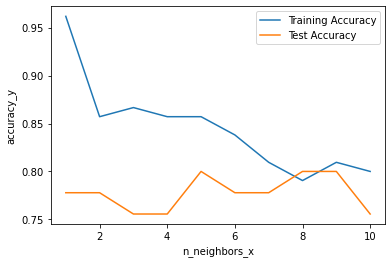

In [3]:
#loading the data.
iris = load_iris()

#creating the features.
X = iris.data[:,:2]
y = iris.target

#splitting the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
plt.ylabel("accuracy_y")
plt.xlabel("n_neighbors_x")
plt.legend()


the old accuracy including ten neighbors: 0.7555555555555555 
the new accuracy including eight neighbors: 0.8


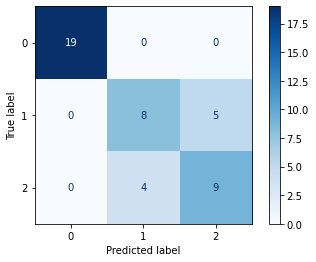

In [4]:
updated_knn = KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)
plot_confusion_matrix(updated_knn, X_test, y_test, cmap = plt.cm.Blues)
print("the old accuracy including ten neighbors: {} \nthe new accuracy including eight neighbors: {}".format(knn.score(X_test,y_test), updated_knn.score(X_test,y_test)))

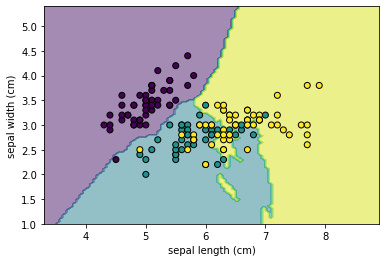

In [5]:
disp = DecisionBoundaryDisplay.from_estimator(updated_knn, X, response_method="predict",xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

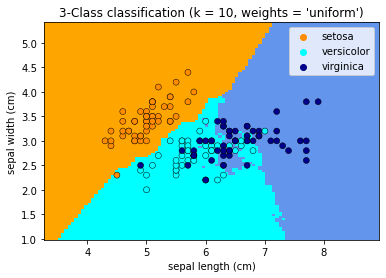

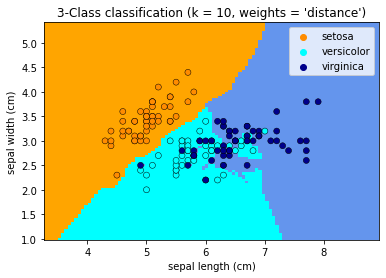

In [6]:
from matplotlib.colors import ListedColormap
import seaborn as sns

#loading the data.
iris = load_iris()

#creating the features.
X = iris.data[:,:2]
y = iris.target

#splitting the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "cyan", "darkblue"]

for weights in ["uniform", "distance"]:
    knn = KNeighborsClassifier(n_neighbors= 8, weights=weights)
    knn.fit(X, y)
    
    fig, axes = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(knn, X, cmap=cmap_light, ax=axes, response_method="predict", plot_method="pcolormesh", 
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto"
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y], #slicing
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %s, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()